In [1]:
%matplotlib inline
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import csv
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import sklearn.tree as tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('mnist.csv')
Features1 = data.iloc[:,1:784]
Lables1 = data.iloc[:,0]
Features1 = np.asarray(Features1)
Lables1 = np.asarray(Lables1)
Features = data.iloc[1:4000,1:784]
Lables = data.iloc[1:4000,0]
Features = np.asarray(Features)
Lables = np.asarray(Lables)

In [3]:
#learning curve function from sklearn tutorial

from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import GradientBoostingClassifier

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.
    title : string
        Title for the chart.
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.
    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.
        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.
        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [4]:
#Splitting the data into a training set and a testing set
FeatTrain, FeatTest, LablesTrain, LablesTest = train_test_split(Features, Lables, random_state=0, test_size = 0.3)

# Supervised Learning

# 1) Neural Networks on the Fashion-MNIST dataset



In [5]:
FeatTrain1, FeatTest1, LablesTrain1, LablesTest1 = train_test_split(Features1, Lables1, random_state=0, test_size = 0.2)
FeatTrain1, FeatVal, LablesTrain1, LablesVal = train_test_split(FeatTrain1, LablesTrain1, random_state=0, test_size = 0.1)

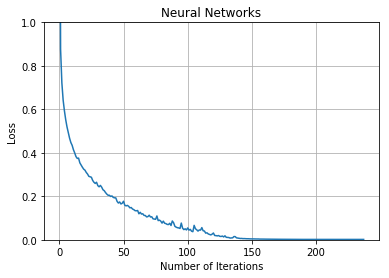

81.125


In [6]:
clf1 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100,100),max_iter=5000, activation = 'relu', solver = 'sgd', learning_rate = 'adaptive')
clf1.fit(FeatTrain1, LablesTrain1)
loss_values = clf1.loss_curve_
plt.plot(loss_values)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Neural Networks")
plt.grid()
plt.ylim([0,1])
plt.show()
Validation = clf1.predict(FeatVal)
ValAccuracy = accuracy_score(LablesVal, Validation) * 100.
print(ValAccuracy)

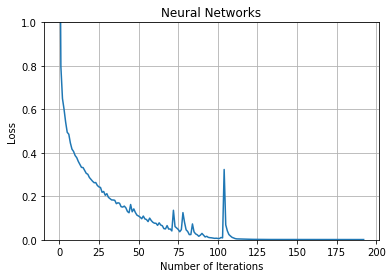

83.875


In [7]:
clf3 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100,100,100,100),max_iter=5000, activation = 'relu', solver = 'sgd', learning_rate = 'adaptive')
clf3.fit(FeatTrain1, LablesTrain1)
loss_values = clf3.loss_curve_
plt.plot(loss_values)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Neural Networks")
plt.grid()
plt.ylim([0,1])
plt.show()
Validation = clf3.predict(FeatVal)
ValAccuracy = accuracy_score(LablesVal, Validation) * 100.
print(ValAccuracy)

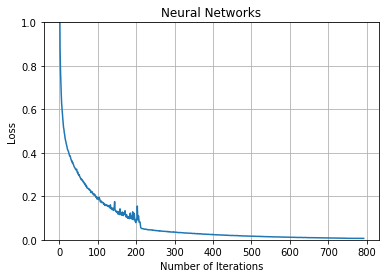

81.625


In [8]:
clf4 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100),max_iter=5000, activation = 'relu', solver = 'sgd', learning_rate = 'adaptive')
clf4.fit(FeatTrain1, LablesTrain1)
loss_values = clf4.loss_curve_
plt.plot(loss_values)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Neural Networks")
plt.grid()
plt.ylim([0,1])
plt.show()
Validation = clf4.predict(FeatVal)
ValAccuracy = accuracy_score(LablesVal, Validation) * 100.
print(ValAccuracy)

In [9]:
Testing = clf4.predict(FeatTest1)
TestAccuracy = accuracy_score(LablesTest1, Testing) * 100.
print(TestAccuracy)

80.85


# 2) KNN Classifier on the Fashion-MNIST dataset

In [38]:
parameters = [{'n_neighbors': range(2,30) } ]
clf = GridSearchCV(KNeighborsClassifier(), parameters, cv =5, scoring = 'accuracy',return_train_score = 'True', iid = 'True')
clf.fit(FeatTrain,LablesTrain)
print(clf.best_params_)

{'n_neighbors': 4}


<module 'matplotlib.pyplot' from '/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

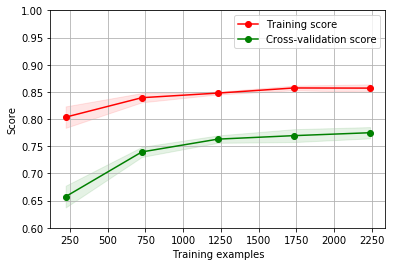

In [10]:
#selecting the parameter which came out after performing a 5 fold cross validation on the training set.
clf = KNeighborsClassifier(n_neighbors = 4)
plot_learning_curve(clf, "", FeatTrain, LablesTrain, ylim=[0.6,1], cv = 5)


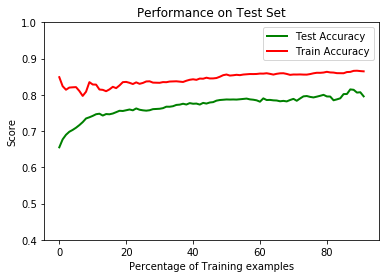

In [5]:
#To the check the performance of the classifier with varying size of the training data
TrainAccuracy = []
TestAccuracy = []
for i in range(3,95):
    clf = KNeighborsClassifier(n_neighbors = 4)
    FeatTrain2, FeatTest2, LablesTrain2, LablesTest2 = train_test_split(Features, Lables, random_state=0, test_size = 1 - i/100.0)
    clf.fit(FeatTrain2,LablesTrain2)
    train_predict = clf.predict(FeatTrain2)
    test_predict = clf.predict(FeatTest2)
    TrainAccuracy.append(accuracy_score(LablesTrain2,train_predict))
    TestAccuracy.append(accuracy_score(LablesTest2, test_predict))
plt.plot(range(len(TestAccuracy)),TestAccuracy,color='green', linewidth=2, markersize=12, label = "Test Accuracy")
plt.plot(range(len(TrainAccuracy)),TrainAccuracy,color='red', linewidth=2, markersize=12,label = "Train Accuracy")
plt.title("Performance on Test Set")
plt.ylim([0.4,1])
plt.xlabel("Percentage of Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# 3) SVM Classifier on the Fashion-MNIST dataset

In [41]:
parameters = [{'kernel': ['rbf'], 'gamma': [1e-6,1e-5,1e-4,1e-3, 1e-2, 1, 10,100,1000],'C': [0.01,1,10, 100, 10000]} ]

clf = GridSearchCV(svm.SVC(), parameters, cv =5, scoring = 'accuracy',return_train_score = 'True', iid = 'True')
clf.fit(FeatTrain, LablesTrain)
print(clf.best_params_)


{'kernel': 'rbf', 'C': 10, 'gamma': 1e-06}


<module 'matplotlib.pyplot' from '/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

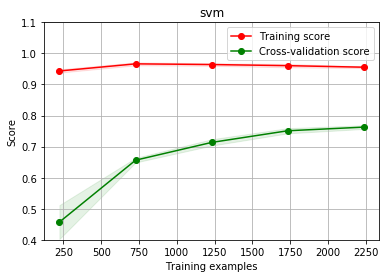

In [11]:
#Using an rbf kernel and value of C = and gamma =  gives us the best cross validation score.
#Using the same values on the test set.


clf = svm.SVC(C=0.6, kernel="rbf", gamma=1e-06)
plot_learning_curve(clf, "svm", FeatTrain, LablesTrain, ylim=[0.4,1.1], cv = 5)


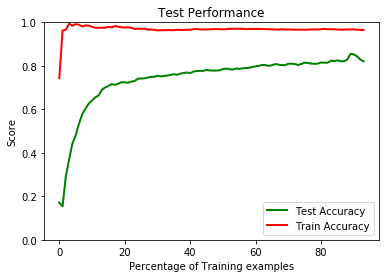

In [17]:
#To the check the performance of the classifier with varying size of the training data
TrainAccuracy = []
TestAccuracy = []
for i in range(1,95):
    clf = svm.SVC(C=0.6, kernel="rbf", gamma=1e-06)
    FeatTrain3, FeatTest3, LablesTrain3, LablesTest3 = train_test_split(Features, Lables, random_state=0, test_size = 1 - i/100.0)
    clf.fit(FeatTrain3,LablesTrain3)
    train_predict = clf.predict(FeatTrain3)
    test_predict = clf.predict(FeatTest3)
    TrainAccuracy.append(accuracy_score(LablesTrain3,train_predict))
    TestAccuracy.append(accuracy_score(LablesTest3, test_predict))
plt.plot(range(len(TestAccuracy)),TestAccuracy,color='green', linewidth=2, markersize=12, label = "Test Accuracy")
plt.plot(range(len(TrainAccuracy)),TrainAccuracy,color='red', linewidth=2, markersize=12,label = "Train Accuracy")
plt.title("Test Performance")
plt.ylim([0,1])
plt.xlabel("Percentage of Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# 4) Decision Tree Classifier on the Fashion-MNIST dataset

In [36]:
#Using cross validation to find the best parameters(depth of the tree)
parameters = [{'max_depth': range(1,50)}]
clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv =5, scoring = 'accuracy',return_train_score = 'True',iid = 'True')
clf.fit(FeatTrain, LablesTrain)
print(clf.best_params_)


{'max_depth': 8}


<module 'matplotlib.pyplot' from '/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

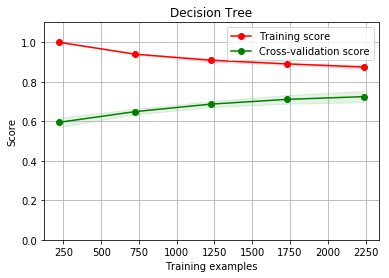

In [12]:
#Using a max depth from the cross validation results.
clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=8)
plot_learning_curve(clf, "Decision Tree", FeatTrain, LablesTrain, ylim=[0,1.1], cv = 5)



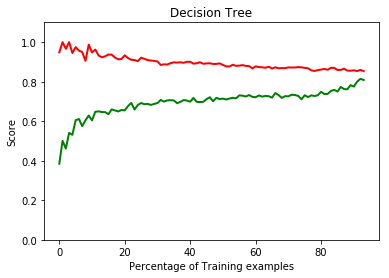

In [19]:
#To the check the performance of the classifier with varying size of the training data
TrainAccuracy = []
TestAccuracy = []
for i in range(1,95):
    clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=8)
    FeatTrain4, FeatTest4, LablesTrain4, LablesTest4 = train_test_split(Features, Lables, random_state=0, test_size = 1 - i/100.0)
    clf.fit(FeatTrain4,LablesTrain4)
    train_predict = clf.predict(FeatTrain4)
    test_predict = clf.predict(FeatTest4)
    TrainAccuracy.append(accuracy_score(LablesTrain4,train_predict))
    TestAccuracy.append(accuracy_score(LablesTest4, test_predict))
plt.plot(range(len(TestAccuracy)),TestAccuracy,color='green', linewidth=2, markersize=12, label = "Test Accuracy")
plt.plot(range(len(TrainAccuracy)),TrainAccuracy,color='red', linewidth=2, markersize=12,label = "Train Accuracy")
plt.title("Decision Tree")
plt.ylim([0,1.1])
plt.xlabel("Percentage of Training examples")
plt.ylabel("Score")
plt.show()

# 5) Boosted Decision Tree Classifier on the Fashion-MNIST dataset

In [8]:
parameters = [{'n_estimators':[100,200,300,400,500] } ]
clf = GridSearchCV(AdaBoostClassifier(), parameters, cv =5, scoring = 'accuracy',return_train_score = 'True', iid = 'True')
clf.fit(FeatTrain,LablesTrain)
print(clf.best_params_)

{'n_estimators': 100}


<module 'matplotlib.pyplot' from '/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

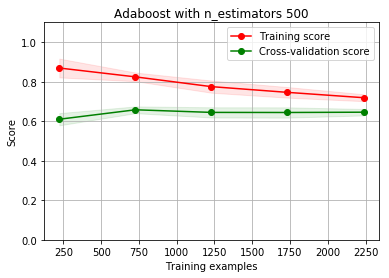

In [10]:
clf = AdaBoostClassifier(n_estimators=100,base_estimator = DecisionTreeClassifier(max_depth=3))
plot_learning_curve(clf, "", FeatTrain, LablesTrain, ylim=[0,1.1],cv=5)

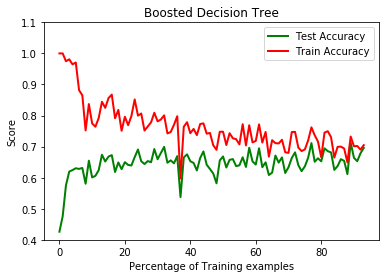

In [13]:
#To the check the performance of the classifier with varying size of the training data
TrainAccuracy = []
TestAccuracy = []
for i in range(1,95):
    clf = AdaBoostClassifier(n_estimators=100,base_estimator = DecisionTreeClassifier(max_depth=3))
    FeatTrain5, FeatTest5, LablesTrain5, LablesTest5 = train_test_split(Features, Lables, random_state=0, test_size = 1 - i/100.0)
    clf.fit(FeatTrain5,LablesTrain5)
    train_predict = clf.predict(FeatTrain5)
    test_predict = clf.predict(FeatTest5)
    TrainAccuracy.append(accuracy_score(LablesTrain5,train_predict))
    TestAccuracy.append(accuracy_score(LablesTest5, test_predict))
plt.plot(range(len(TestAccuracy)),TestAccuracy,color='green', linewidth=2, markersize=12, label = "Test Accuracy")
plt.plot(range(len(TrainAccuracy)),TrainAccuracy,color='red', linewidth=2, markersize=12,label = "Train Accuracy")
plt.title("Boosted Decision Tree")
plt.ylim([0.4,1.1])
plt.xlabel("Percentage of Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()